この課題の目標：matplotlibを用いた分類面の描画

方針:描画したい場所を格子状に分割して、その格子点を用いて描画する

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [6]:
#make_moonsデータの散布図を描画せよ.
#ラベルによって色分けすること．
moons = make_moons(n_samples=100,
                   random_state=0, 
                   noise=0.3
                   ) 
X, y = moons[0], moons[1]

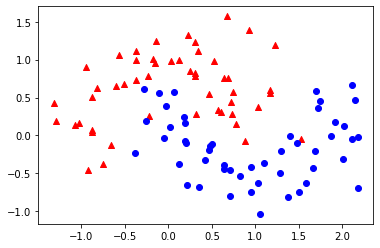

In [7]:
plt.scatter(X[y==0, 0], X[y==0, 1], marker="^", color="r")
plt.scatter(X[y==1, 0], X[y==1, 1], marker="o", color="b")
plt.show()

In [19]:
#変数を訓練データとテストデータに分け、訓練データを用いてモデルを作成し、テストデータを用いてモデルの性能を評価せよ.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)
print(f"train data score: {model.score(X_train, y_train)}")
print(f"test data score: {model.score(X_test, y_test)}")

train data score: 0.95
test data score: 0.9


In [20]:
#描画面をメッシュに区切り、分類面を描画せよ.
x_min, x_max = X[:, 0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

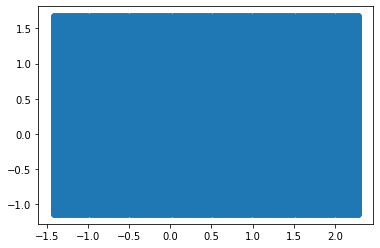

In [21]:
plt.scatter(xx, yy)
plt.show()

In [22]:
X_input = np.c_[xx.flatten(), yy.flatten()]
# X_input = np.vstack([xx.flatten(), yy.flatten()]).T
# X_input = np.hstack([xx.flatten().reshape(-1, 1), yy.flatten().reshape(-1,1)])
print(X_input.shape)

(10000, 2)


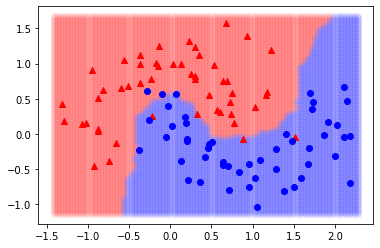

In [23]:
y_pred = model.predict(X_input)
plt.scatter(X_input[y_pred==0, 0], X_input[y_pred==0, 1], color="r", alpha=0.08)
plt.scatter(X_input[y_pred==1, 0], X_input[y_pred==1, 1], color="b", alpha=0.08)
plt.scatter(X[y==0, 0], X[y==0, 1], marker="^", color="r")
plt.scatter(X[y==1, 0], X[y==1, 1], marker="o", color="b")
plt.show()